In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import time
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

warnings.filterwarnings("ignore")

/kaggle/input/flight-price-prediction/business.csv
/kaggle/input/flight-price-prediction/economy.csv
/kaggle/input/flight-price-prediction/Clean_Dataset.csv


# Read Data in and do head

In [2]:
np.random.seed(42)
dataset = pd.read_csv("../input/flight-price-prediction/Clean_Dataset.csv", index_col=0)

dataset.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# Value Counts for much of the columns.

In [3]:
cols = ["airline", "source_city", "departure_time", "stops", "arrival_time", "destination_city", "class"]

for col in cols:
    print("Column Value Counts: ", col)
    print(dataset[col].value_counts())
    print()

Column Value Counts:  airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

Column Value Counts:  source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

Column Value Counts:  departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

Column Value Counts:  stops
one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

Column Value Counts:  arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

Column Value Counts:  destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolka

# Drop flight column

In [4]:
dataset.drop("flight", axis=1, inplace=True)

# Change stops to numerical data

In [5]:
def change_stops(data_record):
    if data_record == "zero":
        return 0
    elif data_record == "one":
        return 1
    else:
        return 2

In [6]:
dataset["stops"] = dataset["stops"].apply(change_stops)

In [7]:
dataset["stops"].value_counts()

1    250863
0     36004
2     13286
Name: stops, dtype: int64

# Plot by airline

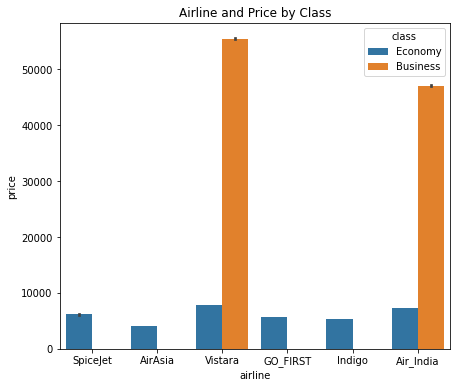

In [8]:
plt.figure(figsize=[7, 6])
sns.barplot(data=dataset, x="airline", y="price", hue="class")
plt.title("Airline and Price by Class")
plt.show()

# Business is much more expensive than economy and there are only 2 airlines that offer business.

# Get a distribution of the price

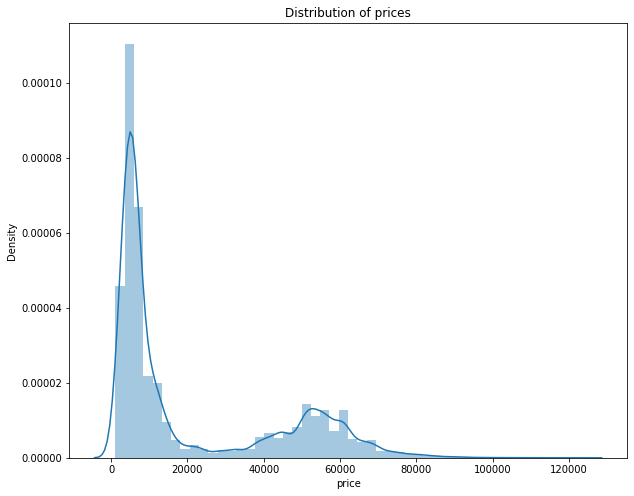

In [9]:
plt.figure(figsize=[10, 8])
sns.distplot(dataset["price"])
plt.title("Distribution of prices")
plt.show()

# Correlation heatmap for those features that are numeric

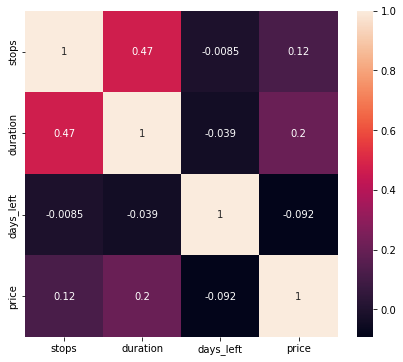

In [10]:
plt.figure(figsize=[7, 6])
sns.heatmap(dataset.corr(), annot=True)
plt.show()

# Show correlation between days left and pricing

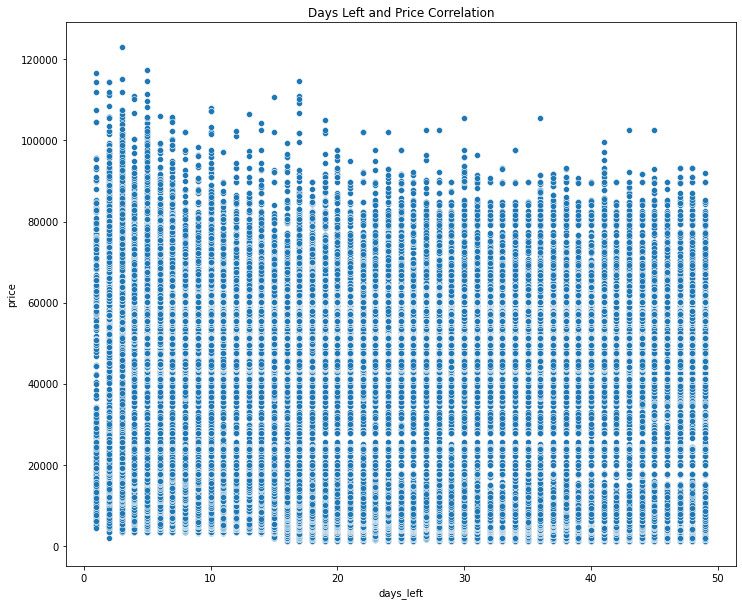

In [11]:
plt.figure(figsize=[12, 10])
sns.scatterplot(x=dataset["days_left"], y=dataset["price"])
plt.title("Days Left and Price Correlation")
plt.show()

# There is no correlation between the days left and price. The heatmap and scatter plot confirm this. days left will be dropped as a feature.

In [12]:
dataset.drop("days_left", axis=1, inplace=True)

# Find correlation between duration and price with class hue

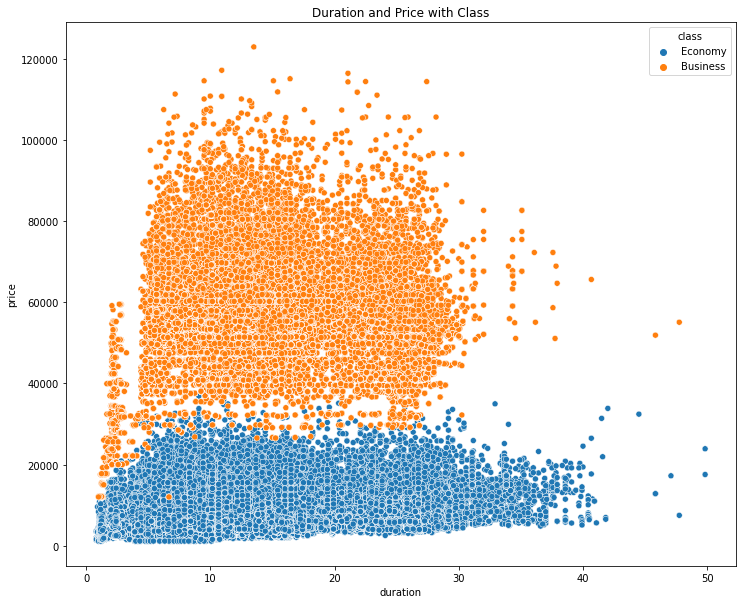

In [13]:
plt.figure(figsize=[12, 10])
sns.scatterplot(x=dataset["duration"], y=dataset["price"], hue=dataset["class"])
plt.title("Duration and Price with Class")
plt.show()

# Strong correlation with the class variable. Not as strong correlation with duration but heatmap shows slight positive correlation.

# Let's see prices per city.

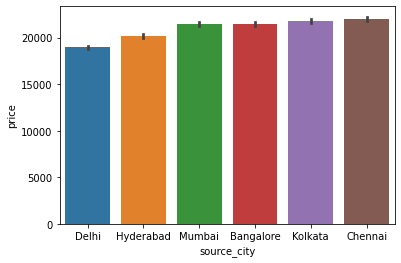

In [14]:
sns.barplot(data=dataset, x="source_city", y="price", order=["Delhi", "Hyderabad", "Mumbai", "Bangalore", "Kolkata", "Chennai"])
plt.show()

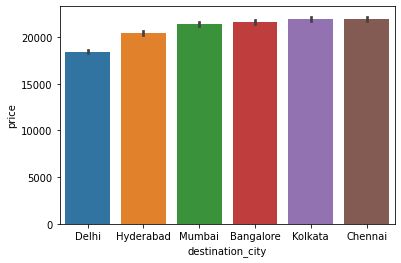

In [15]:
sns.barplot(data=dataset, x="destination_city", y="price", order=["Delhi", "Hyderabad", "Mumbai", "Bangalore", "Kolkata", "Chennai"])
plt.show()

# The prices for source city and destination city were pretty identical.

# Stops along with prices graph

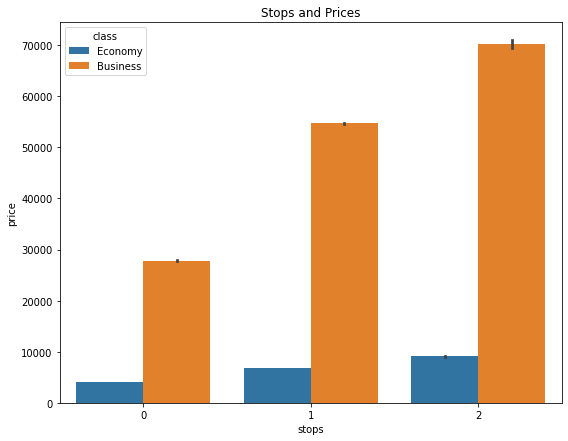

In [16]:
plt.figure(figsize=[9, 7])
sns.barplot(data=dataset, x="stops", y="price", hue="class")
plt.title("Stops and Prices")
plt.show()

# There is an increase in price when there are more stops, and price is very high with 2 or more stops and business class.

In [17]:
dataset[dataset["class"] == "Business"]["arrival_time"].value_counts()

Night            29025
Evening          26399
Morning          21786
Afternoon        10930
Early_Morning     3514
Late_Night        1833
Name: arrival_time, dtype: int64

In [18]:
dataset[dataset["class"] == "Economy"]["departure_time"].value_counts()

Morning          48821
Early_Morning    46688
Evening          44207
Afternoon        35245
Night            30537
Late_Night        1168
Name: departure_time, dtype: int64

# The two classes have similar distributions for departure and arrival time value counts. Late night times are not as common for both.

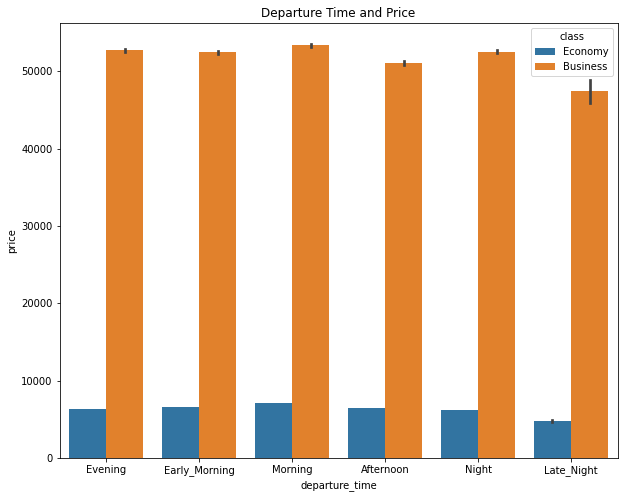

In [19]:
plt.figure(figsize=[10, 8])
sns.barplot(data=dataset, x="departure_time", y="price", hue="class", order=["Evening", "Early_Morning", "Morning", "Afternoon", "Night", "Late_Night"])
plt.title("Departure Time and Price")
plt.show()

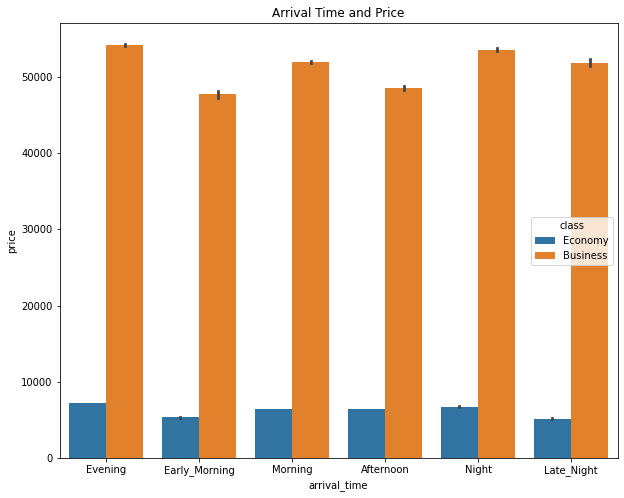

In [20]:
plt.figure(figsize=[10, 8])
sns.barplot(data=dataset, x="arrival_time", y="price", hue="class", order=["Evening", "Early_Morning", "Morning", "Afternoon", "Night", "Late_Night"])
plt.title("Arrival Time and Price")
plt.show()

# There are some slight variations between arrival and departure time prices. It's best to depart late at night and arrive early in the morning if you want a cheap flight. Morning departures and evening arrivals are the most expensive.

# Encode Features

In [21]:
encoded_dataset = pd.get_dummies(dataset)
encoded_dataset.head()

,stops,duration,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,0,2.17,5953,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,0,2.33,5953,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
2,0,2.17,5956,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,2.25,5955,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,0,2.33,5955,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1


# Get Column Names, convert to np array, encode data as another dataset

In [22]:
from sklearn.model_selection import train_test_split

features = encoded_dataset.columns.tolist()
all_data = np.array(dataset)
all_x = all_data[:,0:8]
all_y = all_data[:,8]

all_data_encoded = np.array(encoded_dataset)
all_x_encoded = np.delete(all_data_encoded[:,0:len(encoded_dataset.columns)],2, axis=1)
all_y_encoded = all_data_encoded[:,2]

train_x, test_x, train_y, test_y = train_test_split(all_x, all_y, test_size=.2, random_state=1)

train_x_encoded, test_x_encoded, train_y_encoded, test_y_encoded = train_test_split(all_x_encoded,
                                                                                    all_y_encoded, test_size=.2, random_state=1)
train_x_encoded.shape, train_y_encoded.shape, test_x_encoded.shape, test_y_encoded.shape

((240122, 34), (240122,), (60031, 34), (60031,))

# Train RandomForest Regressor and make predictions

In [23]:
from sklearn.ensemble import RandomForestRegressor

rfr_start = time.time()
RFRmodel = RandomForestRegressor(random_state=1)
RFRmodel.fit(train_x_encoded, train_y_encoded)
RFR_train_pred_y = RFRmodel.predict(train_x_encoded)
RFR_test_pred_y = RFRmodel.predict(test_x_encoded)
rfr_stop = time.time()

# Train CatBoost Regressor and make predictions

In [24]:
dataset.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,5955


In [25]:
from catboost import CatBoostRegressor

cbr_start = time.time()
CBRmodel = CatBoostRegressor(random_state=1, cat_features=[0, 1, 2, 4, 5, 6])
CBRmodel.fit(train_x, train_y, verbose=False)
CBR_train_pred_y = CBRmodel.predict(train_x)
CBR_test_pred_y = CBRmodel.predict(test_x)
cbr_stop = time.time()

# Train XGBoost

In [26]:
import xgboost as xgb

xgb_start = time.time()
XGBmodel = xgb.XGBRegressor(random_state=1)
XGBmodel.fit(train_x_encoded, train_y_encoded)
XGB_train_pred_y = XGBmodel.predict(train_x_encoded)
XGB_test_pred_y = XGBmodel.predict(test_x_encoded)
xgb_stop = time.time()

# Evaludate model with R^2/MAE/MSE

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
def evaluate(model, train_pred_y, test_pred_y, isCatboost):
    
    if isCatboost:
        train_r2 = model.score(train_x, train_y)
        test_r2 = model.score(test_x, test_y)
        
    
        train_mse = mean_squared_error(train_pred_y, train_y)
        test_mse = mean_squared_error(test_pred_y, test_y)
    
        train_mae = mean_absolute_error(train_pred_y, train_y)
        test_mae = mean_absolute_error(test_pred_y, test_y)
        
    else:
        train_r2 = model.score(train_x_encoded, train_y_encoded)
        test_r2 = model.score(test_x_encoded, test_y_encoded)
        
    
        train_mse = mean_squared_error(train_pred_y, train_y_encoded)
        test_mse = mean_squared_error(test_pred_y, test_y_encoded)
    
        train_mae = mean_absolute_error(train_pred_y, train_y_encoded)
        test_mae = mean_absolute_error(test_pred_y, test_y_encoded)
    
    return train_r2, test_r2, train_mse, test_mse, train_mae, test_mae

In [29]:
rfr_train_r2, rfr_test_r2, rfr_train_mse, rfr_test_mse, rfr_train_mae, rfr_test_mae = evaluate(RFRmodel, RFR_train_pred_y, RFR_test_pred_y, False)
cbr_train_r2, cbr_test_r2, cbr_train_mse, cbr_test_mse, cbr_train_mae, cbr_test_mae = evaluate(CBRmodel, CBR_train_pred_y, CBR_test_pred_y, True) 
xgb_train_r2, xgb_test_r2, xgb_train_mse, xgb_test_mse, xgb_train_mae, xgb_test_mae = evaluate(XGBmodel, XGB_train_pred_y, XGB_test_pred_y, False) 

# Feature Importances

In [30]:
#def toString(list):
 #   newList = []
  #  for i in range(len(list)):
   #     a = "{:.4f}".format(list[i])
    #    if a == "0.0000":
     #       continue
      #  newList.insert(i, round(float(a) * 100, 2))
    #return newList

In [31]:
#RF_importance = toString((RFmodel.feature_importances_).tolist())
#GBC_importance = toString((GBCmodel.feature_importances_).tolist())
#XGB_importance = toString((XGBmodel.feature_importances_).tolist())

In [32]:
#fig, ax = plt.subplots(figsize=(5,24))
#ax.pie(RF_importance, labels=RF_importance)
#plt.title('Random Forest: Feature Importance')
#ax.legend(features[:len(RF_importance)], title='Features',loc='center right', bbox_to_anchor=(1, 0, .5, 1))
#plt.show()

In [33]:
#fig, ax = plt.subplots(figsize=(5,24))
#ax.pie(GBC_importance, labels=GBC_importance)
#plt.title('Gradient Boosting Classifier: Feature Importance')
#ax.legend(features[:len(GBC_importance)], title='Features',loc='center right', bbox_to_anchor=(1, 0, .5, 1))
#plt.show()

In [34]:
#fig, ax = plt.subplots(figsize=(5,24))
#ax.pie(XGB_importance, labels=XGB_importance)
#plt.title('XGBoost Classifier: Feature Importance')
#ax.legend(features[:len(XGB_importance)], title='Features',loc='center right', bbox_to_anchor=(1, 0, .5, 1))
#plt.show()

# Show table of models, accuracies, and runtimes

In [35]:

evaluation_table_train = pd.DataFrame({
    
     "Model" : ["Random Forest Regressor", "Catboost Regressor", "XGBoost Regressor"],
     "MAE" : [round(rfr_train_mae), round(cbr_train_mae), round(xgb_train_mae)],
     "R^2" : [round(rfr_train_r2, 4), round(cbr_train_r2, 4),  round(xgb_train_r2, 4)],
     "Train and Predict Run Time (s)" : [round(rfr_stop - rfr_start), round(cbr_stop - cbr_start), round(xgb_stop - xgb_start)]
})

evaluation_table_train

,Model,MAE,R^2,Train and Predict Run Time (s)
0,Random Forest Regressor,2021,0.9790,77
1,Catboost Regressor,2822,0.9653,106
2,XGBoost Regressor,2707,0.9679,23


In [36]:

evaluation_table_test = pd.DataFrame({
    
     "Model" : ["Random Forest Regressor", "Catboost Regressor", "XGBoost Regressor"],
     "MAE" : [round(rfr_test_mae), round(cbr_test_mae), round(xgb_test_mae)],
     "R^2" : [round(rfr_test_r2, 4), round(cbr_test_r2, 4),  round(xgb_test_r2, 4)],
     "Train and Predict Run Time (s)" : [round(rfr_stop - rfr_start), round(cbr_stop - cbr_start), round(xgb_stop - xgb_start)]
})

evaluation_table_test

,Model,MAE,R^2,Train and Predict Run Time (s)
0,Random Forest Regressor,2148,0.9763,77
1,Catboost Regressor,2835,0.9650,106
2,XGBoost Regressor,2731,0.9672,23


In [37]:
mae_baseline = abs(all_y - all_y.mean()).mean()

# Barplot of MAE and models

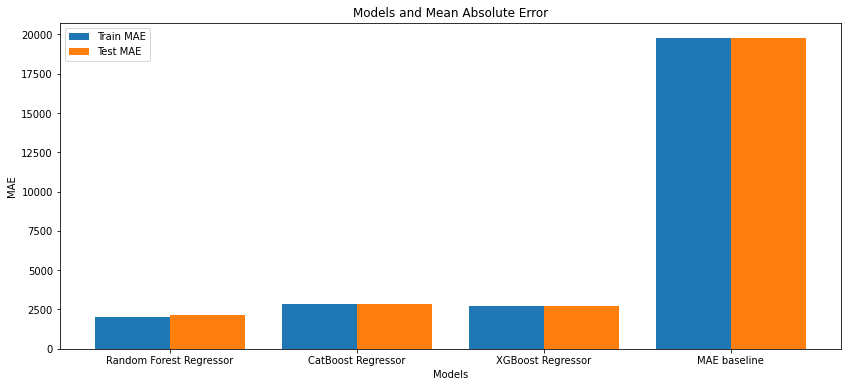

In [38]:
models = ['Random Forest Regressor', 'CatBoost Regressor', 'XGBoost Regressor', 'MAE baseline']
train_mae = [rfr_train_mae, cbr_train_mae, xgb_train_mae, mae_baseline]
test_mae = [rfr_test_mae, cbr_test_mae, xgb_train_mae, mae_baseline]


plt.figure(figsize=[14, 6])
x_axis = np.arange(len(models))
plt.bar(x_axis - 0.2, train_mae, 0.4, label = 'Train MAE')
plt.bar(x_axis + 0.2, test_mae, 0.4, label = 'Test MAE')
plt.xticks(x_axis, models)
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Models and Mean Absolute Error')
plt.legend()
plt.show()

# R2 plotting

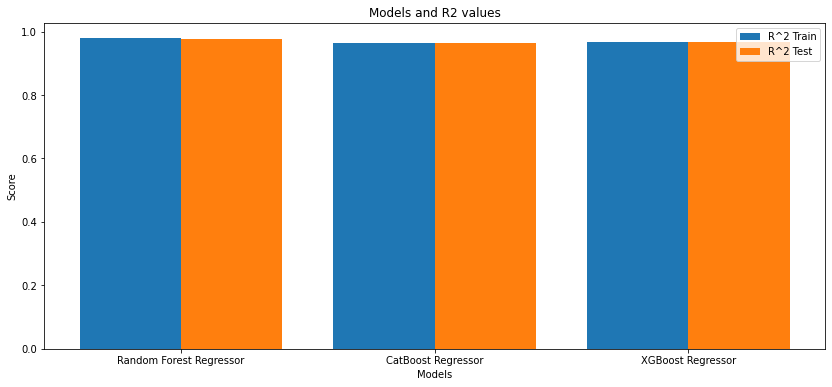

In [39]:
models = ['Random Forest Regressor', 'CatBoost Regressor', 'XGBoost Regressor']
train_mae = [rfr_train_r2, cbr_train_r2, xgb_train_r2]
test_mae = [rfr_test_r2, cbr_test_r2, xgb_train_r2]

plt.figure(figsize=[14, 6])
x_axis = np.arange(len(models))
plt.bar(x_axis - 0.2, train_mae, 0.4, label = 'R^2 Train')
plt.bar(x_axis + 0.2, test_mae, 0.4, label = 'R^2 Test')
plt.xticks(x_axis, models)
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Models and R2 values')
plt.legend()
plt.show()

# Total Run Time, which include training and predicting.

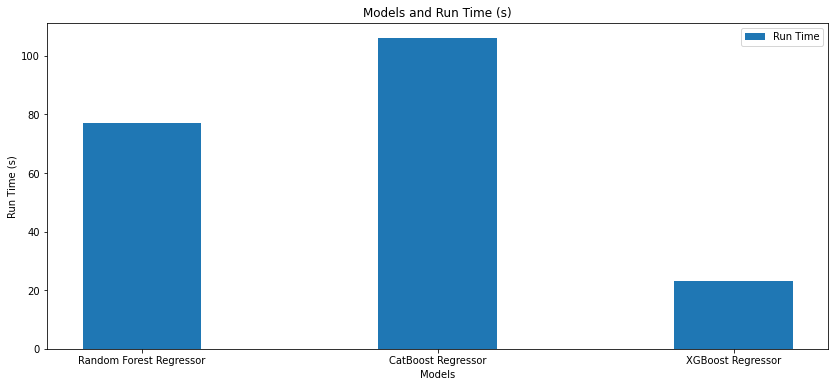

In [40]:
models = ['Random Forest Regressor', 'CatBoost Regressor', 'XGBoost Regressor']
run_time = [round(rfr_stop - rfr_start), round(cbr_stop - cbr_start), round(xgb_stop - xgb_start)]

plt.figure(figsize=[14, 6])
x_axis = np.arange(len(models))
plt.bar(x_axis, run_time, 0.4, label = 'Run Time')
plt.xticks(x_axis, models)
plt.xlabel('Models')
plt.ylabel('Run Time (s)')
plt.title('Models and Run Time (s)')
plt.legend()
plt.show()

# Feature Importance for Catboost

# Hyperparameter Tuning

# Figure out best model and do confusion matrix

# Feature importance to see what sleep features matter